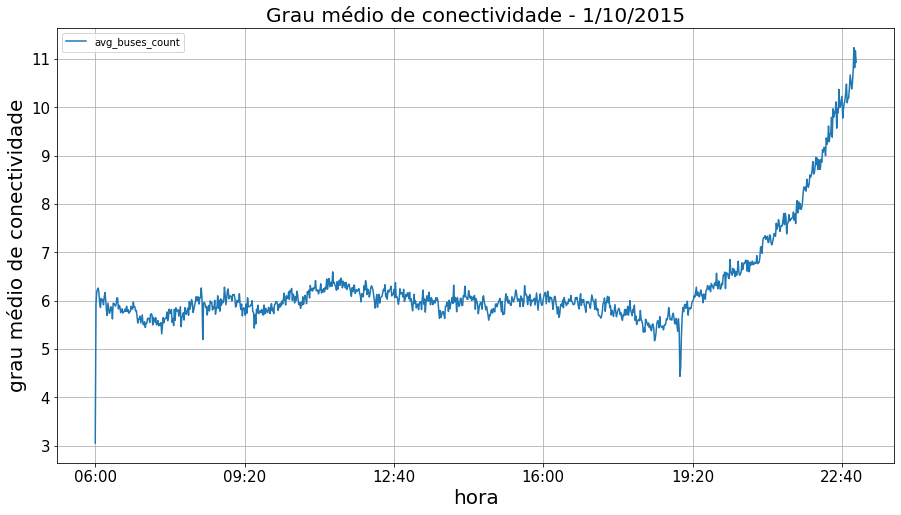

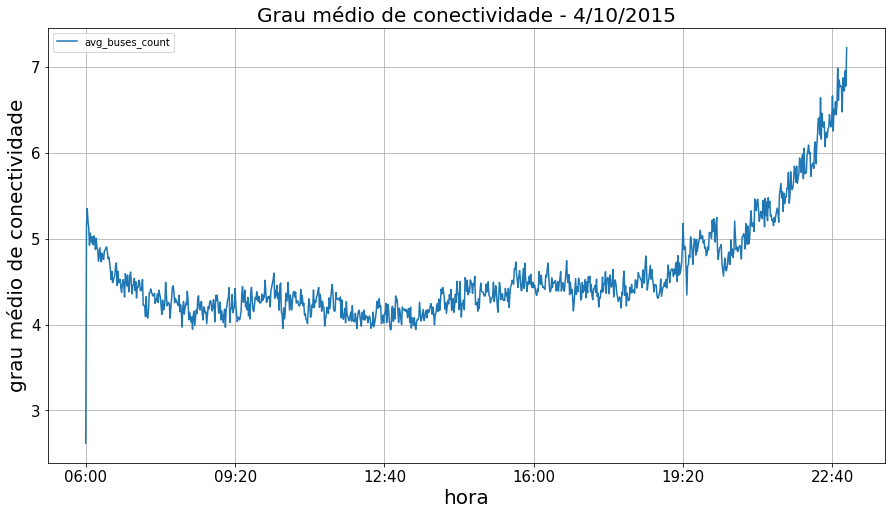

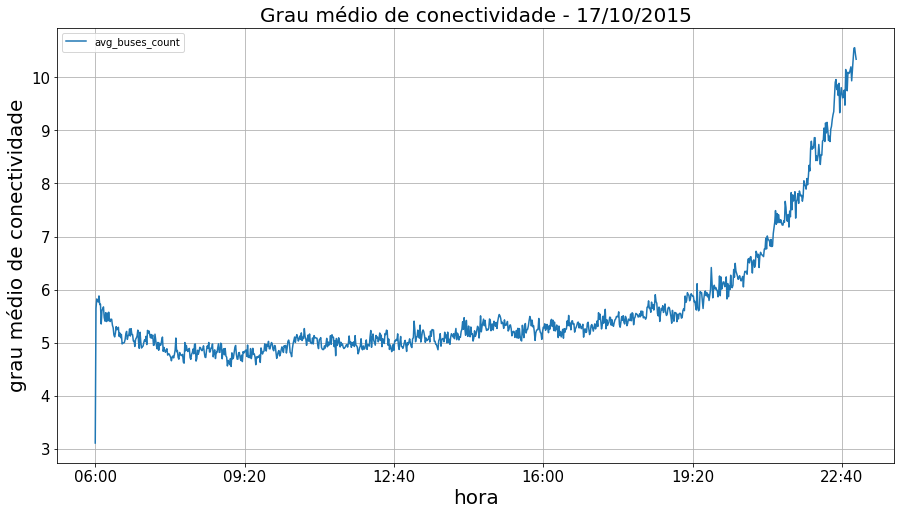

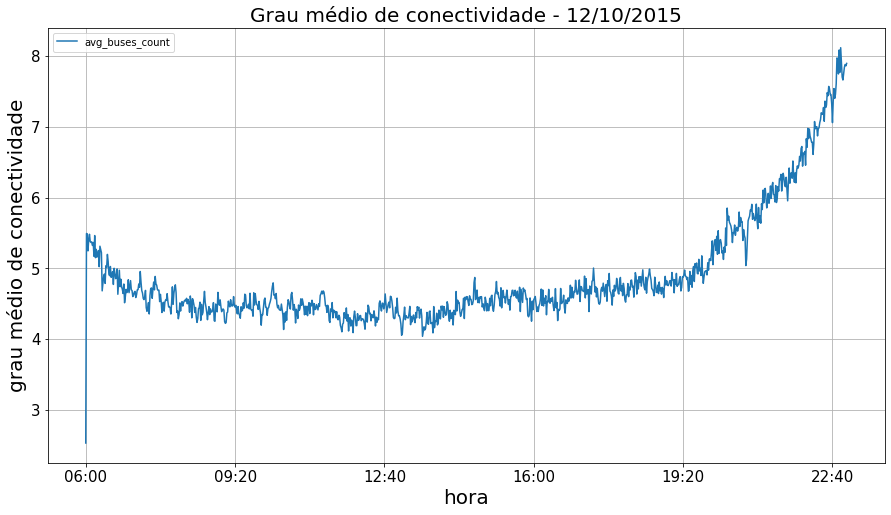

In [128]:
# Vehicle Degree
import matplotlib.pyplot as plt
import pandas as pd

days_to_analyze = [1,4,17,12]

for day in days_to_analyze:

    df_degree_per_bus_graph = pd.read_parquet(f"./metrics-calculation/connectivity-metrics/vehicle-degree-per-minute/MO_1510{day}/")\
        .sort_values(by=["time"])

    ax = df_degree_per_bus_graph.plot(x ="time",y = "avg_buses_count",title=f"Grau médio de conectividade - {day}/10/2015",figsize=(15,8))
    # x axis label
    ax.set_xlabel("hora",size=20)
    # y axis label
    ax.set_ylabel("grau médio de conectividade",size=20)
    
    # title fontsize
    ax.title.set_size(20)
    plt.grid(True)
    # size of the number in both axis
    ax.tick_params(axis='both', which='major', labelsize=15)
    
    ax.get_figure().savefig(f'./charts-results/degree-vertices-per-minute/day-{day}-degree-vehicles.png',bbox_inches='tight')

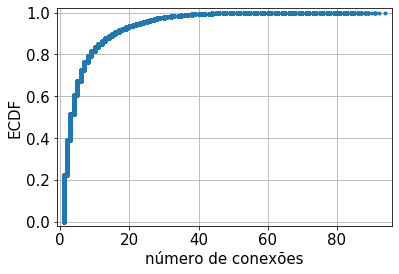

In [28]:
# ECDF connectivy degree
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_parquet(f"./metrics-calculation/connectivity-metrics/vehicle-degree-per-graph/MO_1510{1}/")


x= np.sort(df["counter_buses_connections"])
y= np.arange(1,len(x)+1) / len(x)
plt.plot(x,y,marker=".",linestyle="none")
ax = plt.gca()
plt.margins(0.02)

ax.set_xlabel("número de conexões",size=15)
# y axis label
ax.set_ylabel("ECDF",size=15)

#title fontsize
ax.title.set_size(20)
plt.grid(True)
# size of the number in both axis
ax.tick_params(axis='both', which='major', labelsize=15)
plt.savefig("./charts-results/connections-degree-ecdf.png",dpi=300)

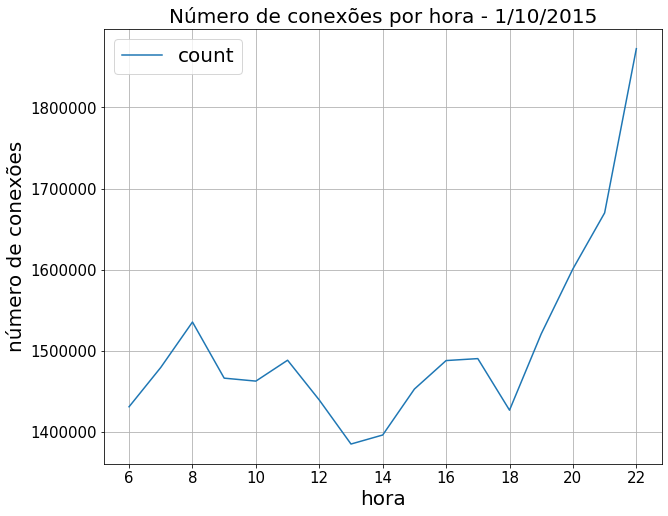

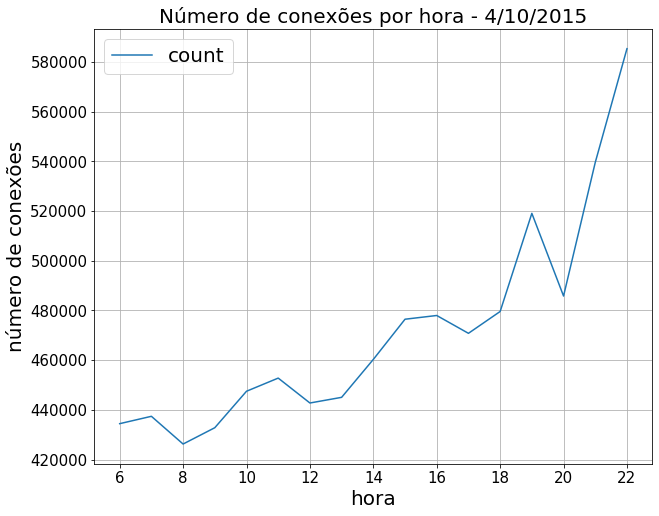

In [287]:
# Number Connections per hour
# Vehicle Degree
import matplotlib.pyplot as plt
import pandas as pd

days_to_analyze = [1,4]

for day in days_to_analyze:

    df = pd.read_csv(f"./metrics-calculation/connectivity-metrics/hour-conn-{day}.csv",delimiter=";",header=None)\
        .sort_values(by=[0])
    df.columns = ["hour","count"]

    ax = df.plot(x ="hour",y = "count",title=f"Número de conexões por hora - {day}/10/2015",figsize=(10,8))
    # x axis label
    ax.set_xlabel("hora",size=20)
    # y axis label
    ax.set_ylabel("número de conexões",size=20)
    
    # title fontsize
    ax.title.set_size(20)
    plt.grid(True)
    # size of the number in both axis
    ax.tick_params(axis='both', which='major', labelsize=15)
    
    ax.get_figure().savefig(f'./charts-results/numero-conn-hour-{day}.png',bbox_inches='tight')

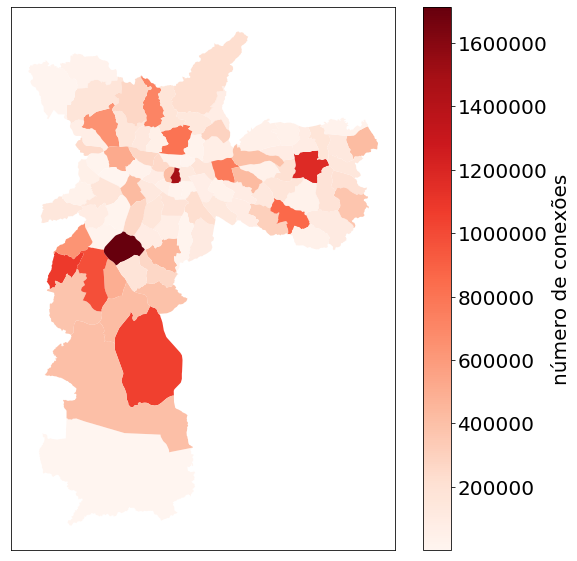

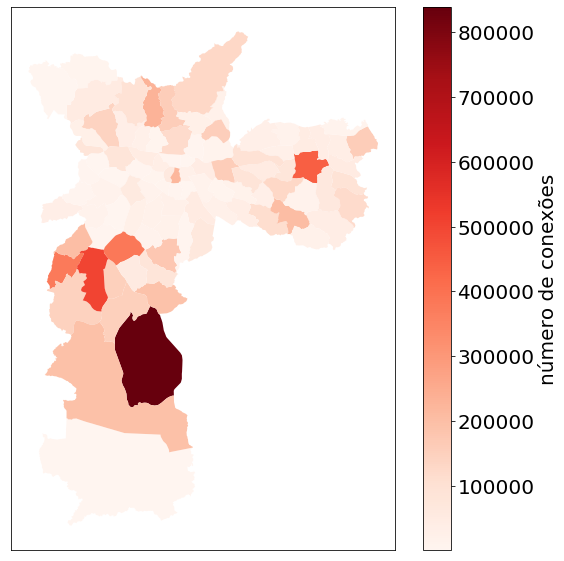

In [286]:
# number conn per region

# Number of buses per region per hour

import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib

# Sao Paulo shape
sp = gpd.read_file("./shape-files-sp/DISTRITO_MUNICIPAL_SP_SMDUPolygon.shp")

days_to_analyze = [1,4]
font = {'size': 20}

matplotlib.rc('font', **font)

for day in days_to_analyze:
    # speed by region per day
    df = pd.read_parquet(f"./metrics-calculation/connectivity-metrics/region-conn/MO_1510{day}/")
    # getting the shape of the region
    df_final = pd.merge(df, sp, left_on = "region", right_on = "Nome").drop(columns = ["Nome"])
    
    geo_df = gpd.GeoDataFrame(df_final, geometry = "geometry")

    # Plotting map
    ax = geo_df.plot(column="total_per_day",legend=True,cmap='Reds',legend_kwds={'label': "número de conexões"},figsize = (10,10))
        
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
        
    plt.savefig(f'./charts-results/conn-by-region-day_{day}-10-2015.png',bbox_inches='tight')
        

In [ ]:
# Repeated connection during the day

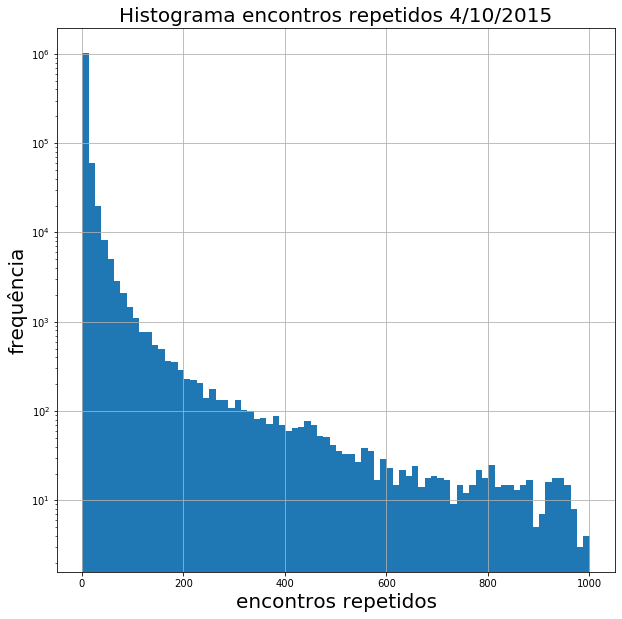

In [3]:
# Histograma total

import matplotlib.pyplot as plt
import pandas as pd

day = 4
df = pd.read_parquet(f"./metrics-calculation/connectivity-metrics/repeated-connection-per-day/MO_1510{day}/")
ax = df["count_per_day"].plot.hist(logy=True,figsize=(10,10),bins=80)
plt.grid(True)
ax.set_xlabel("encontros repetidos",size=20)
ax.set_ylabel("frequência",size=20)
plt.title(f"Histograma encontros repetidos {day}/10/2015",size=20)
plt.savefig(f'./charts-results/historgrama-total-{day}-20.png',bbox_inches='tight')

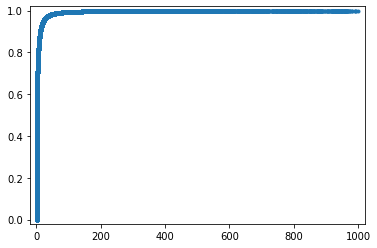

In [5]:
import numpy as np

x= np.sort(df["count_per_day"])
y= np.arange(1,len(x)+1) / len(x)
_ = plt.plot(x,y,marker=".",linestyle="none")
plt.margins(0.02)

In [11]:
len(df)

5021404

In [386]:
df[df["count_per_day"] == 3].head(10)

,connection_id,count_per_day
45,38682-43707,3
58,35758-51310,3
67,35205-58436,3
81,42577-57502,3
91,11386-38742,3
128,8563-56600,3
148,8565-47053,3
154,38301-41485,3
171,42046-56550,3
173,14408-37912,3


In [369]:
# connection - day 4
13975-14010 - 662
9134-9309 - 662
35812-35908 - 200
37220-38073 - 200
39791-40346 - 50
11665-47162 - 50
11336-11670 - 20
39297-40590 - 20

# connection - day 1
9981-11048 - 858
38760-38795 - 200
11984-12402 - 200
39884-40427 - 50
9673-9745 - 50
42020-56337 - 20
40749-57946 - 20
42020-56337 - 40
11007-44874 - 30
12006-12563 - 25
42562-56472 - 15
36796-42263 - 10 
13367-40693 - 7
42857-52386 - 5
38682-43707  - 3
38682-43707 	3
58 	35758-51310 	3
67 	35205-58436 	3
81 	42577-57502 	3
91 	11386-38742 	3
128 	8563-56600 	3
148 	8565-47053 	3
154 	38301-41485 	3
171 	42046-56550 	3
173 	14408-37912 	

SyntaxError: invalid syntax (<ipython-input-369-621341794c10>, line 26)

In [26]:
import folium
import pandas as pd

day = 1
connection = "11984-12402"
map_folium = folium.Map([-23.477476,-46.610409], zoom_start=12)

# tile = folium.TileLayer('cartodbpositron').add_to(map_folium)
tile = folium.TileLayer('OpenStreetMap').add_to(map_folium)


df = pd.read_parquet(f"./metrics-calculation/connectivity-metrics/testing-plotting-map/MO_1510{day}-8")

df = df.loc[df["connection_id"] == connection]

coords_1 = df[["latitude_1","longitude_1"]].values.tolist()
coords_2 = df[["latitude_2","longitude_2"]].values.tolist()

for coord in coords_1:
    icon = folium.features.CustomIcon('orange-point.png', icon_size=(20,20))
    folium.Marker(coord,icon=icon).add_to(map_folium)

for coord in coords_2:
    icon = folium.features.CustomIcon('green-point.png', icon_size=(20,20))
    folium.Marker(coord,icon=icon).add_to(map_folium)
    


map_folium.save(f"./teste-{connection}.html")

In [9]:
import pandas as pd 
df = pd.read_parquet("./metrics-calculation/apagueme-teste/")

In [10]:
df["id_avl_1"].nunique()

14000